# keras getting started

In [1]:
from keras.datasets import mnist

Using TensorFlow backend.
/Users/spencer/Documents/Personal/learn-python/venv-ml/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [2]:
from keras.utils import to_categorical

(train_img, train_lable), (test_img, test_lable) = mnist.load_data()

train_img = train_img.reshape((-1, train_img.shape[1] * train_img.shape[2])).astype('float32') / 255
train_lbl = to_categorical(train_lable)

test_img = test_img.reshape((-1, test_img.shape[1] * test_img.shape[2])).astype('float32') / 255
test_lbl = to_categorical(test_lable)

In [3]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(484, activation='relu', input_shape=(28*28,), name='input'))
network.add(layers.Dense(10, activation='softmax', name='decision'))

In [4]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [5]:
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 484)               379940    
_________________________________________________________________
decision (Dense)             (None, 10)                4850      
Total params: 384,790
Trainable params: 384,790
Non-trainable params: 0
_________________________________________________________________


In [6]:
from keras.callbacks import TensorBoard
tensorboard = TensorBoard(log_dir='./tensorboard', histogram_freq=1, write_images=True)

network.fit(train_img, train_lbl, epochs=5, batch_size=128, callbacks=[tensorboard], validation_split=.2)

Instructions for updating:
Use the retry module or similar alternatives.
Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 2s 43us/step - loss: 0.2878 - acc: 0.9170 - val_loss: 0.1502 - val_acc: 0.9553
Epoch 2/5
48000/48000 [==============================] - 2s 38us/step - loss: 0.1182 - acc: 0.9645 - val_loss: 0.1083 - val_acc: 0.9683
Epoch 3/5
48000/48000 [==============================] - 2s 38us/step - loss: 0.0771 - acc: 0.9770 - val_loss: 0.1022 - val_acc: 0.9689
Epoch 4/5
48000/48000 [==============================] - 2s 38us/step - loss: 0.0552 - acc: 0.9832 - val_loss: 0.0914 - val_acc: 0.9721
Epoch 5/5
48000/48000 [==============================] - 2s 38us/step - loss: 0.0418 - acc: 0.9879 - val_loss: 0.1028 - val_acc: 0.9697


In [7]:
network.evaluate(test_img, test_lbl)

10000/10000 [==============================] - 0s 37us/step


[0.09320662646698766, 0.9704]

In [8]:
import matplotlib.pyplot as plt

plt.imshow(test_img[0].reshape(28, 28))
plt.figure()
plt.imshow(test_img[1].reshape(28, 28))
network.predict_classes(test_img[0:2]), test_lable[0:2]

(array([7, 2]), array([7, 2], dtype=uint8))

In [9]:
import numpy as np
np.log(network.predict_proba(np.array([test_img[0]])))

array([[-1.8074766e+01, -1.9409588e+01, -1.3279238e+01, -7.8681216e+00,
        -3.0707033e+01, -1.6308725e+01, -2.8844477e+01, -3.8512016e-04,
        -1.6470894e+01, -1.4832757e+01]], dtype=float32)

In [10]:
from keras.models import Model

intermediate_layer_model = Model(inputs=network.input,
                                 outputs=network.layers[0].output)
intermediate_output = intermediate_layer_model.predict(test_img[0:2])
intermediate_output.shape

(2, 484)

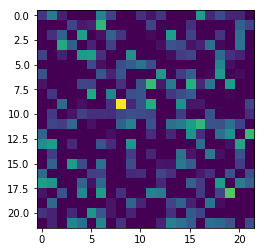

In [11]:
plt.imshow(intermediate_output[0].reshape(22, 22))

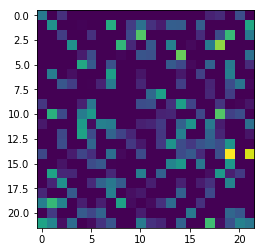

In [12]:
plt.imshow(intermediate_output[1].reshape(22, 22))

In [13]:
l = network.layers[0]
l.get_config()

{'activation': 'relu',
 'activity_regularizer': None,
 'batch_input_shape': (None, 784),
 'bias_constraint': None,
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'bias_regularizer': None,
 'dtype': 'float32',
 'kernel_constraint': None,
 'kernel_initializer': {'class_name': 'VarianceScaling',
  'config': {'distribution': 'uniform',
   'mode': 'fan_avg',
   'scale': 1.0,
   'seed': None}},
 'kernel_regularizer': None,
 'name': 'input',
 'trainable': True,
 'units': 484,
 'use_bias': True}

In [14]:
weights = l.get_weights()
len(weights)

2

In [15]:
28*28

784

In [16]:
weights[0].shape, weights[1].shape

((784, 484), (484,))

In [17]:
weights[0].shape

(784, 484)

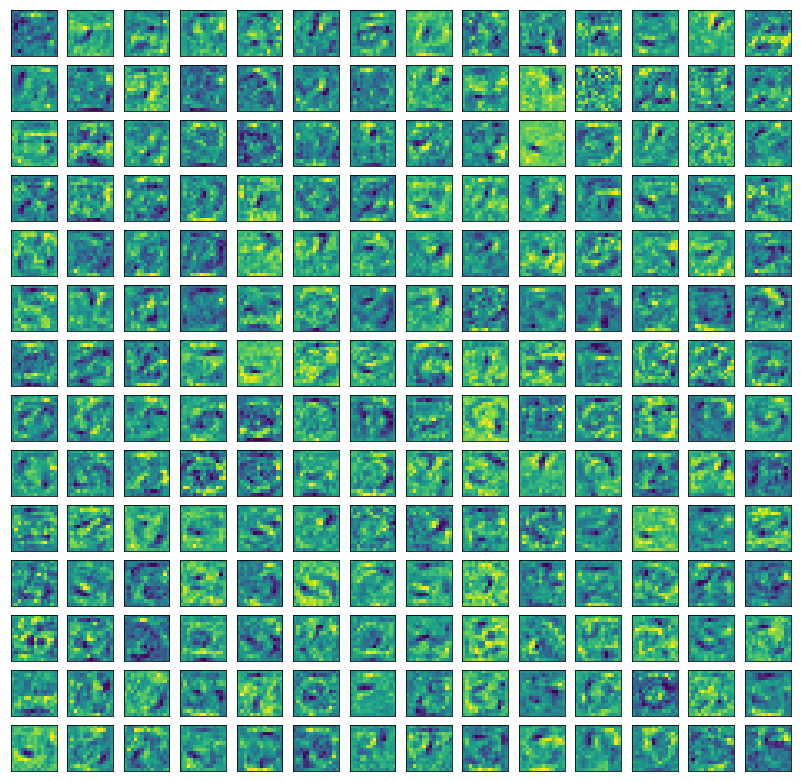

In [33]:
from skimage.measure import block_reduce

N = 14
fig, axes = plt.subplots(N, N, figsize=(N, N))
for i in range(0, N):
    for j in range(0, N):
        smaller = block_reduce(weights[0][:, i*N + j].reshape(28, 28), block_size=(2, 2), func=np.mean)
        ax = axes[i, j]
        ax.imshow(smaller)
        ax.set_xticks([])
        ax.set_yticks([])